> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [8]:
# 🔧 Add code here
X = youtube[logical_columns]
y = youtube['high_engagement']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
nb_model_1 = BernoulliNB()
nb_model_1.fit(x_train_1, y_train_1)

y_pred_nb_1 = nb_model_1.predict(x_test_1)

print("Confusion Matrix (test_size=0.2):\n", confusion_matrix(y_test_1, y_pred_nb_1))
print("\nClassification Report (test_size=0.2):\n", classification_report(y_test_1, y_pred_nb_1))
print("Accuracy (test_size=0.2):", accuracy_score(y_test_1, y_pred_nb_1))

X_no_celeb_funny = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]
y_no_celeb_funny = youtube['high_engagement']

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_no_celeb_funny, y_no_celeb_funny, test_size=0.3, random_state=42)

nb_model_2 = BernoulliNB()
nb_model_2.fit(x_train_2, y_train_2)

y_pred_nb_2 = nb_model_2.predict(x_test_2)

print("\nConfusion Matrix (dropped features, test_size=0.3):\n", confusion_matrix(y_test_2, y_pred_nb_2))
print("\nClassification Report (dropped features, test_size=0.3):\n", classification_report(y_test_2, y_pred_nb_2))
print("Accuracy (dropped features, test_size=0.3):", accuracy_score(y_test_2, y_pred_nb_2))

Confusion Matrix (test_size=0.2):
 [[15 12]
 [ 8 10]]

Classification Report (test_size=0.2):
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45

Accuracy (test_size=0.2): 0.5555555555555556

Confusion Matrix (dropped features, test_size=0.3):
 [[24 14]
 [20 10]]

Classification Report (dropped features, test_size=0.3):
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.42      0.33      0.37        30

    accuracy                           0.50        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.50      0.49        68

Accuracy (dropped features, test_size=0.3): 0.5


### ✍️ Your Response: 🔧
1. The model setup that performed the best was test size 0.2. That might be because we are training on more data.

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [10]:
# 🔧 Add code here:
svm_model_1 = SVC(kernel='poly', C=0.1, gamma='scale')
svm_model_1.fit(X_train_svm, y_train_svm)

y_pred_svm_1 = svm_model_1.predict(X_test_svm)

print("Confusion Matrix (C=0.1):\n", confusion_matrix(y_test_svm, y_pred_svm_1))
print("\nClassification Report (C=0.1):\n", classification_report(y_test_svm, y_pred_svm_1))
print("Accuracy (C=0.1):", accuracy_score(y_test_svm, y_pred_svm_1))

svm_model_2 = SVC(kernel='poly', C=10, gamma='scale')
svm_model_2.fit(X_train_svm, y_train_svm)

y_pred_svm_2 = svm_model_2.predict(X_test_svm)

print("\nConfusion Matrix (C=10):\n", confusion_matrix(y_test_svm, y_pred_svm_2))
print("\nClassification Report (C=10):\n", classification_report(y_test_svm, y_pred_svm_2))
print("Accuracy (C=10):", accuracy_score(y_test_svm, y_pred_svm_2))

svm_model_3 = SVC(kernel='poly', C=1, gamma='scale')
svm_model_3.fit(X_train_svm, y_train_svm)

y_pred_svm_3 = svm_model_3.predict(X_test_svm)

print("\nConfusion Matrix (C=1):\n", confusion_matrix(y_test_svm, y_pred_svm_3))
print("\nClassification Report (C=1):\n", classification_report(y_test_svm, y_pred_svm_3))
print("Accuracy (C=1):", accuracy_score(y_test_svm, y_pred_svm_3))

Confusion Matrix (C=0.1):
 [[25 13]
 [18 12]]

Classification Report (C=0.1):
               precision    recall  f1-score   support

           0       0.58      0.66      0.62        38
           1       0.48      0.40      0.44        30

    accuracy                           0.54        68
   macro avg       0.53      0.53      0.53        68
weighted avg       0.54      0.54      0.54        68

Accuracy (C=0.1): 0.5441176470588235

Confusion Matrix (C=10):
 [[21 17]
 [14 16]]

Classification Report (C=10):
               precision    recall  f1-score   support

           0       0.60      0.55      0.58        38
           1       0.48      0.53      0.51        30

    accuracy                           0.54        68
   macro avg       0.54      0.54      0.54        68
weighted avg       0.55      0.54      0.55        68

Accuracy (C=10): 0.5441176470588235

Confusion Matrix (C=1):
 [[24 14]
 [16 14]]

Classification Report (C=1):
               precision    recall  f1-sc

### ✍️ Your Response: 🔧
1. The tradeoff between values of C is: if the C value is too large then it tried to be too accurate and can overfit (poor generalization), while if it is too small may lead to underfitting (better generalization).
2. C = 1 gave the best accuracy.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5340 - loss: 0.7026 - val_accuracy: 0.5147 - val_loss: 0.6951
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5125 - loss: 0.7028 - val_accuracy: 0.4853 - val_loss: 0.6982
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4528 - loss: 0.7116 - val_accuracy: 0.5441 - val_loss: 0.7005
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5207 - loss: 0.7078 - val_accuracy: 0.5441 - val_loss: 0.7036
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5582 - loss: 0.6867 - val_accuracy: 0.5147 - val_loss: 0.7047
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5455 - loss: 0.6735 - val_accuracy: 0.4706 - val_loss: 0.7084
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6050 - loss: 0.6504 - val_accuracy: 0.5000 - val_loss: 0.7101
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6053 - loss: 0.6568 - val_accuracy: 0.5147 - val_loss: 0.7

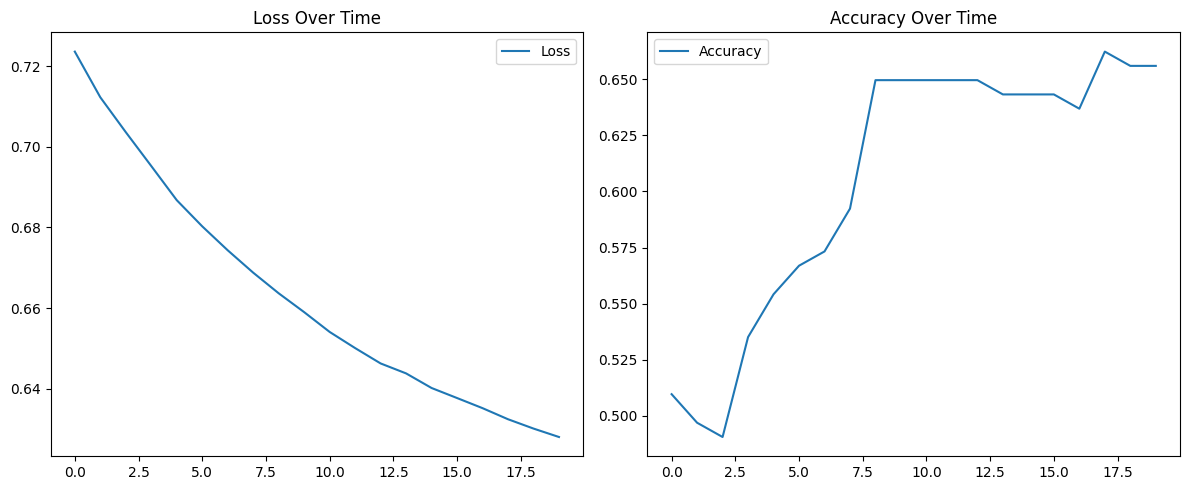

In [12]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.


In [16]:
# 🔧 Add code here
#1
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=32, verbose=1)

y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)

print("Confusion Matrix 3 layers 32 batch size:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report 3 layers 32 batch size:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy 3 layers 32 batch size:", accuracy_score(y_test_svm, y_pred_nn))

#2
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(16, activation='relu'),  #Layer 2
    Dense(8, activation='relu'),  #Layer 3
    Dense(4, activation='relu'),  #Layer 4
    Dense(2, activation='relu'),  #Layer 5
    Dense(1, activation='sigmoid') #Output Layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)

print("Confusion Matrix 5 layers 16 batch size:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report 5 layers 16 batch size:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy 5 layers 16 batch size:", accuracy_score(y_test_svm, y_pred_nn))

#3
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(16, activation='relu'),  #Layer 2
    Dense(8, activation='relu'),  #Layer 3
    Dense(4, activation='relu'),  #Layer 4
    Dense(2, activation='relu'),  #Layer 5
    Dense(1, activation='sigmoid') #Output Layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=32, verbose=1)

y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)

print("Confusion Matrix with 5 layers 32 batch size:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report with Dropout 5 layers 32 btahc size:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy with Dropout 5 layers 32 batch size:", accuracy_score(y_test_svm, y_pred_nn))

#4
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(1, activation='sigmoid'),  #Output Layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)

print("Confusion Matrix with 1 layer batch size 16:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report with Dropout 1 layer batch size 16:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy with Dropout 1 layer batch size 16:", accuracy_score(y_test_svm, y_pred_nn))

#5
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(1, activation='sigmoid'),  #Output Layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=32, verbose=1)

y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)

print("Confusion Matrix with 1 layer batch size 32:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report with Dropout 1 layer batch size 32:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy with Dropout 1 layer batch size 32:", accuracy_score(y_test_svm, y_pred_nn))

#dropout
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dropout(0.5),
    Dense(8, activation='relu'),  #Layer 2
    Dropout(0.5),
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid'),  #Output Layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)

print("Confusion Matrix with Dropout:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report with Dropout:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy with Dropout:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5187 - loss: 0.7563 - val_accuracy: 0.4412 - val_loss: 0.8650
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5136 - loss: 0.7199 - val_accuracy: 0.4412 - val_loss: 0.8405
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5096 - loss: 0.7399 - val_accuracy: 0.4412 - val_loss: 0.8193
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4941 - loss: 0.6986 - val_accuracy: 0.4559 - val_loss: 0.8018
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5143 - loss: 0.6891 - val_accuracy: 0.4559 - val_loss: 0.7894
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5226 - loss: 0.6928 - val_accuracy: 0.4559 - val_loss: 0.7790
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5554 - loss: 0.6583 - val_accuracy: 0.4559 - val_loss: 0.7720
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5557 - loss: 0.6611 - val_accuracy: 0.4412 - val_loss: 0.7667
Epoch 9/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5235 - loss: 0.6944 - val_accuracy: 0.6029 - val_loss: 0.6938
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5200 - loss: 0.6917 - val_accuracy: 0.4412 - val_loss: 0.6942
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5494 - loss: 0.6860 - val_accuracy: 0.4412 - val_loss: 0.6950
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5149 - loss: 0.6835 - val_accuracy: 0.4412 - val_loss: 0.6957
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5611 - loss: 0.6775 - val_accuracy: 0.4412 - val_loss: 0.6968
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5227 - loss: 0.6820 - val_accuracy: 0.4412 - val_loss: 0.6985
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5018 - loss: 0.6765 - val_accuracy: 0.4412 - val_loss: 0.7007
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5560 - loss: 0.6694 - val_accuracy: 0.4412 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5355 - loss: 0.6927 - val_accuracy: 0.4265 - val_loss: 0.6952
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5654 - loss: 0.6900 - val_accuracy: 0.4412 - val_loss: 0.6959
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5445 - loss: 0.6907 - val_accuracy: 0.4412 - val_loss: 0.6966
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5670 - loss: 0.6874 - val_accuracy: 0.4412 - val_loss: 0.6973
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5636 - loss: 0.6875 - val_accuracy: 0.4412 - val_loss: 0.6980
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5644 - loss: 0.6874 - val_accuracy: 0.4412 - val_loss: 0.6988
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5223 - loss: 0.6870 - val_accuracy: 0.4412 - val_loss: 0.6996
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5727 - loss: 0.6838 - val_accuracy: 0.4412 - val_loss: 0.7008
Epoch 9/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5167 - loss: 0.7463 - val_accuracy: 0.4559 - val_loss: 0.7671
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4655 - loss: 0.7781 - val_accuracy: 0.4559 - val_loss: 0.7557
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4742 - loss: 0.7572 - val_accuracy: 0.4559 - val_loss: 0.7477
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5326 - loss: 0.7135 - val_accuracy: 0.4412 - val_loss: 0.7425
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4993 - loss: 0.7149 - val_accuracy: 0.4559 - val_loss: 0.7373
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5032 - loss: 0.7133 - val_accuracy: 0.4559 - val_loss: 0.7347
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5528 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.7329
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5223 - loss: 0.6963 - val_accuracy: 0.4853 - val_loss: 0.73

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5600 - loss: 0.6774 - val_accuracy: 0.5147 - val_loss: 0.7060
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6056 - loss: 0.6637 - val_accuracy: 0.5147 - val_loss: 0.7077
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6311 - loss: 0.6570 - val_accuracy: 0.5147 - val_loss: 0.7097
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6085 - loss: 0.6582 - val_accuracy: 0.5147 - val_loss: 0.7119
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5734 - loss: 0.6605 - val_accuracy: 0.5147 - val_loss: 0.7135
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5443 - loss: 0.6656 - val_accuracy: 0.5147 - val_loss: 0.7149
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5859 - loss: 0.6634 - val_accuracy: 0.5147 - val_loss: 0.7166
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6371 - loss: 0.6474 - val_accuracy: 0.5000 - val_loss: 0.7182
Epoch 9/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5484 - loss: 0.7335 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5923 - loss: 0.7409 - val_accuracy: 0.4559 - val_loss: 0.7060
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4941 - loss: 0.7268 - val_accuracy: 0.5147 - val_loss: 0.7075
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4617 - loss: 0.7163 - val_accuracy: 0.5294 - val_loss: 0.7085
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6060 - loss: 0.6689 - val_accuracy: 0.4853 - val_loss: 0.7097
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4852 - loss: 0.7241 - val_accuracy: 0.4412 - val_loss: 0.7108
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5311 - loss: 0.7252 - val_accuracy: 0.4412 - val_loss: 0.7126
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4491 - loss: 0.7299 - val_accuracy: 0.4412 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


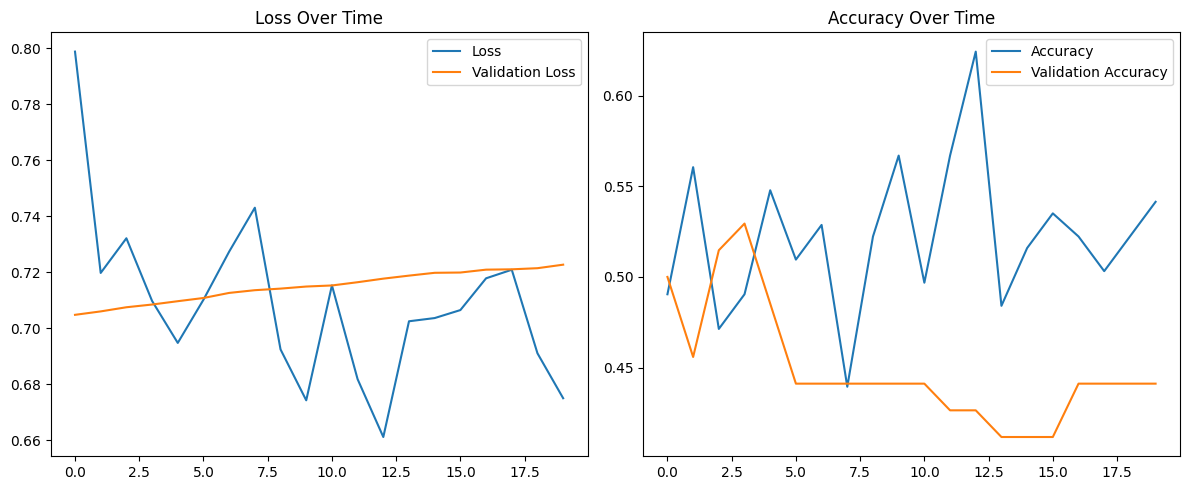

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. The optimal number of layers and batch size is 5 layers and batch size of 16.
2. Dropout did not help with overfitting. According to the graphs, there are several drops in accuracy.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. The model that performed the best was the neural networks with 5 layers and 16 batch size, with an accuracy of 0.57 accuracy. I expected this because neural networks are more complex and flexible.
2. The Naive Bayes and SVM configurations seemed to underfit, with lower accuracy scores. The neural network seems to overfit, because despite increased accuracy, the validation accuracy didn't increase.
3. Out of all of them, I would recommend the neural networks as they have the highest accuracy. The best one (5 layers of 16 batch size) allows for a prediction accuracy of 57%. However, they are all pretty bad, and have lower accuracy scores.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [ ]:
!jupyter nbconvert --to html "lab_12_LastnameFirstname.ipynb"